In [133]:
import numpy as np

In [134]:
class KMeans:

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

        self.cluster_centers = None
        self.labels = None

    def fit(self, X, distance_func, n_iter = 1000) -> None:
        # Init cluster centers randomly
        self.cluster_centers = X[np.random.choice(np.arange(len(X)), size = self.n_clusters, replace = False), :]

        for _ in range(n_iter):
            # Assign points to the nearest cluster center
            distances = np.zeros((X.shape[0], self.n_clusters))
            for c in range(self.n_clusters):
                distances[:, c] = distance_func(X, self.cluster_centers[c].reshape((1, -1)))
            self.labels = np.argmin(distances, axis = 1)

            # Move cluster centers
            old_centers = self.cluster_centers.copy()
            for c in range(self.n_clusters):
                if c in self.labels:
                    self.cluster_centers[c] = np.mean(X[self.labels == c, :], axis = 0)
            
            # Check termination condition
            if np.sum(np.linalg.norm(old_centers - self.cluster_centers, 2)) < 1e-5:
                break

In [135]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

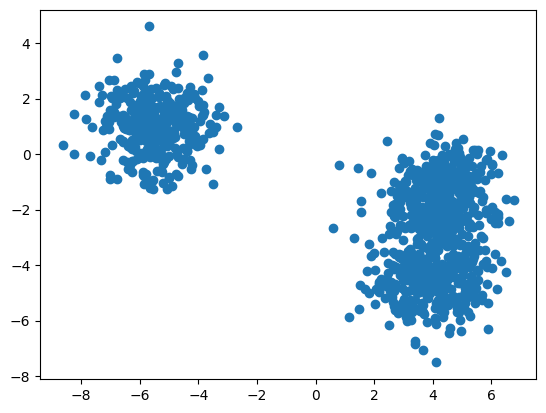

In [136]:
np.random.seed(123)
X = make_blobs(n_samples = 1000, n_features = 2, centers = 3)[0]
plt.scatter(X[:, 0], X[:, 1])

In [137]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2, axis = 1)

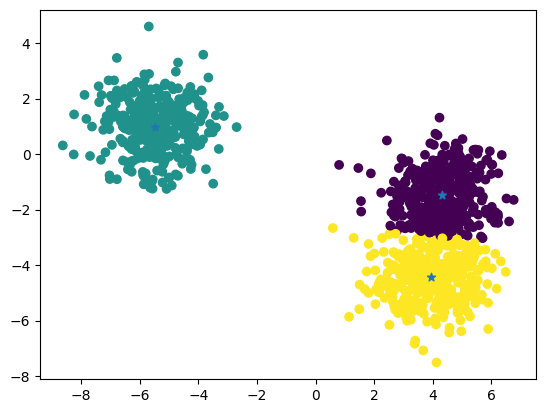

In [138]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X = X, distance_func = euclidean_distance)
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels)
plt.scatter(kmeans.cluster_centers[:, 0], kmeans.cluster_centers[:, 1], marker = "*")

In [143]:
def chebyshev_distance(p1, p2):
    return np.max(np.abs(p1 - p2), axis = 1)

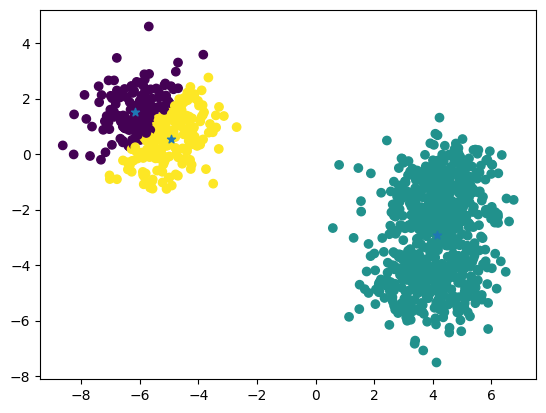

In [144]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X = X, distance_func = chebyshev_distance)
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels)
plt.scatter(kmeans.cluster_centers[:, 0], kmeans.cluster_centers[:, 1], marker = "*")